#TP2:  Génération et Lecture des données avec Python


> **Groupe-8**


* Tanekeu Bill Jordan-------------------------------19M2459

* Ndongo Ndongo Papia Ange Borel--------19M2308

* Ghomsi Sikali Diane Laure---------------------18U2202

* Tchuimo Wamba Jordan------------------------19M2396 

Il est souvent difficile d'obtenir des données de test appropriées.
Certains coûtent très cher, d'autres ne sont pas
disponibles gratuitement car ils sont protégés par le droit
d'auteur. Les données de test artificielles peuvent être
une solution dans certains cas.

c'est pour cette raison que nous traitons dans ce notebook la génération artificielle de données.

## Utilisation de Pandas et Numpy pour générer les données.

Le code Python suivant est un exemple simple dans lequel nous créons des données météorologiques artificielles pour certaines villes allemandes.

- villes: est une liste contenant les différentes villes
- n: nombre de villes
- data: dictionnaires ayant 3 clés (Température, Humidité et vent) et des vecteurs comme valeurs
- np.random.normal(mean,scale,n) produit des échantillons aléatoires à partir d'une distribution normale (gaussienne).
mean = moyenne , scale = l'ecart-type, et n le nombre d'élément
- df est la dataframe crée par Pandas

In [ ]:
import pandas as pd
import numpy as np

villes = ['Berlin', 'Francfort', 'Hambourg',
          'Nuremberg', 'Munich', 'Stuttgart',
          'Hanovre', 'Sarrebruck', 'Cologne',
          'Constance', 'Fribourg', 'Karlsruhe'
        ]

n = len(villes)

data = {'Température': np.random.normal(24, 3, n),
            'Humidité': np.random.normal(78, 2.5, n),
            'Vent': np.random.normal(15, 4, n)
        }
df = pd.DataFrame(data= data, index=villes)
df

,Température,Humidité,Vent
Berlin,29.934939,75.496650,11.666113
Francfort,24.506766,77.078020,15.519067
Hambourg,26.549199,76.692442,14.336120
Nuremberg,24.283987,77.609359,12.587961
Munich,31.607918,75.498011,18.567022
Stuttgart,19.090867,86.288600,20.642066
Hanovre,27.111053,78.864894,10.669014
Sarrebruck,21.632282,73.218056,14.223112
Cologne,26.166579,79.574823,15.271711
Constance,25.663618,79.225441,15.723718


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10, type=int):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
def truncated_normal_floats(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num)
def truncated_normal_ints(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num).astype(np.uint8)
    

In [ ]:
# nombres d'elements pour chaques classe de fleurs:
number_of_items_per_class = [190, 205, 230, 170]
flowers = {}
# flos Pythonem:
number_of_items = number_of_items_per_class[0]
reds = truncated_normal_ints(mean=254, sd=18, low=235, upp=256,
num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=15, low=0, upp=20,
num=number_of_items)
calyx_dia = truncated_normal_floats(3.8, 0.3, 3.4, 4.2,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_pythonem"] = data
# flos Java:
number_of_items = number_of_items_per_class[1]
reds = truncated_normal_ints(mean=245, sd=17, low=226, upp=256,
num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=10, low=0, upp=20,
num=number_of_items)
calyx_dia = truncated_normal_floats(3.3, 0.3, 3.0, 3.5,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_java"] = data

In [ ]:
# flos Java:
number_of_items = number_of_items_per_class[2]
reds = truncated_normal_ints(mean=206, sd=17, low=175, upp=238,
num=number_of_items)
greens = truncated_normal_ints(mean=99, sd=14, low=80, upp=120,
num=number_of_items)
blues = truncated_normal_ints(mean=1, sd=5, low=0, upp=12,
num=number_of_items)
calyx_dia = truncated_normal_floats(4.1, 0.3, 3.8, 4.4,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_margarita"] = data
# flos artificialis:
number_of_items = number_of_items_per_class[3]
reds = truncated_normal_ints(mean=255, sd=8, low=2245, upp=2255,
num=number_of_items)
greens = truncated_normal_ints(mean=254, sd=10, low=240, upp=255,
num=number_of_items)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
blues = truncated_normal_ints(mean=101, sd=5, low=90, upp=112,
num=number_of_items)
calyx_dia = truncated_normal_floats(2.9, 0.4, 2.4, 3.5,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_artificialis"] = data
data = np.concatenate((flowers["flos_pythonem"],
                       flowers["flos_java"],
                       flowers["flos_margarita"],
                       flowers["flos_artificialis"]
                       ), axis=0)
# attribution des etiquetes
target = np.zeros(sum(number_of_items_per_class)) # on a 4 fleurs
previous_end = 0
for i in range(1, 5):
    num = number_of_items_per_class[i-1]
    beg = previous_end
    target[beg: beg + num] += i
    previous_end = beg + num
conc_data = np.concatenate((data, target.reshape(target.shape[0]
,1)),
                           axis=1)
np.savetxt("strange_flowers.txt", conc_data, fmt="%2.2f",)

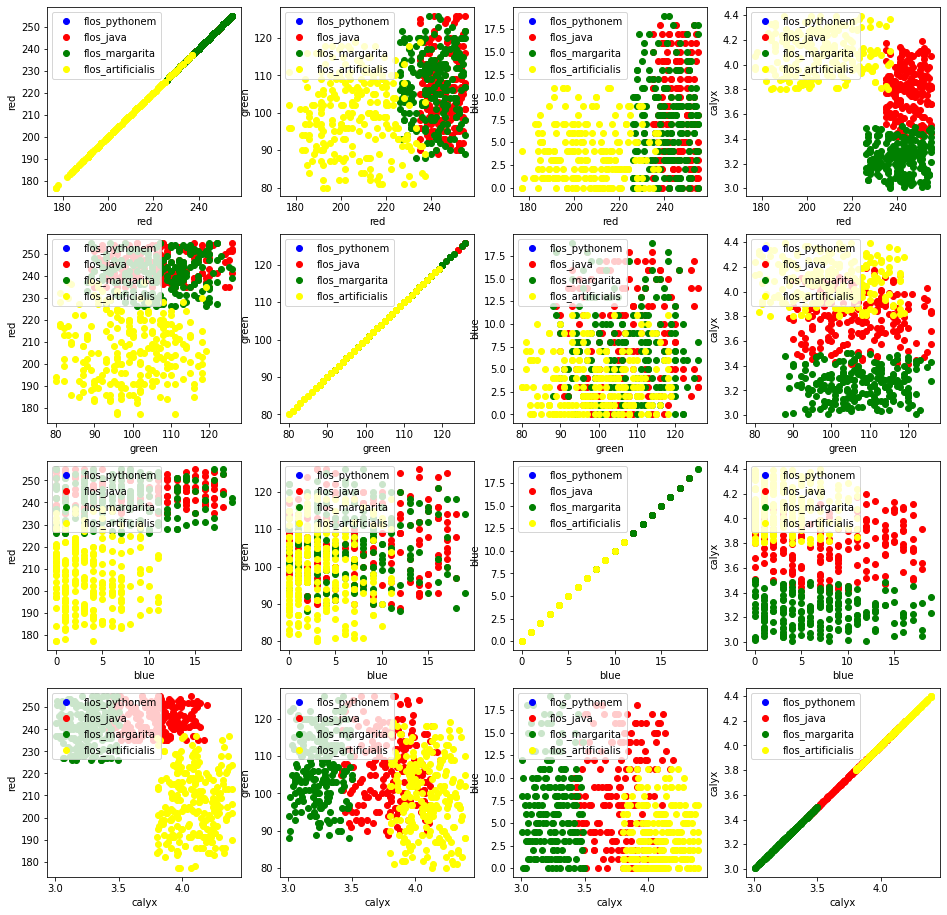

In [ ]:
#importation de matplotlib pour le tracage 
import matplotlib.pyplot as plt
target_names = list(flowers.keys())
feature_names = ['red', 'green', 'blue', 'calyx']
n = 4
fig, ax = plt.subplots(n, n, figsize=(16, 16))
colors = ['blue', 'red', 'green', 'yellow']
for x in range(n):
    for y in range(n):
        xname = feature_names[x]
        yname = feature_names[y]
        for color_ind in range(len(target_names)):
            ax[x, y].scatter(data[target==color_ind, x],
                             data[target==color_ind, y],
                             label=target_names[color_ind],
                             c=colors[color_ind])
            ax[x, y].set_xlabel(xname)
            ax[x, y].set_ylabel(yname)
            ax[x, y].legend(loc='upper left')
plt.show()


In [ ]:
#utilisation de sklearn pour cree de donnees symetriques
#la fonction make_blobs de skearn.datasets est utiliser pour cree des 'blob'comme distribution de donnees
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
data, labels = make_blobs(n_samples=1000,
#centers=n_classes,
centers=np.array([[2, 3], [4, 5], [7,
9]]),
                          random_state=1)
labels = labels.reshape((labels.shape[0],1))
all_data = np.concatenate((data, labels), axis=1)
all_data[:10]
np.savetxt("squirrels.txt", all_data)
all_data[:10]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])

le code précedent permet notamment de créer un jeu de données simulé de 1000 observations et trois variables entières dont les centres sont précisés dans le code. la troisième variable étant l'étiquette(qui est soit 0 ou soit 1 ou soit 2).  le résultat de cette simulation est enregistré comme un dataset avec extension .txt

In [ ]:
import numpy as np
a = np.array( [[1, 2], [3, 4]])
b = np.array( [5, 6])
b = b.reshape((b.shape[0], 1))
print(b)
x = np.concatenate( (a, b), axis=1)
x

[[5]
 [6]]


array([[1, 2, 5],
       [3, 4, 6]])

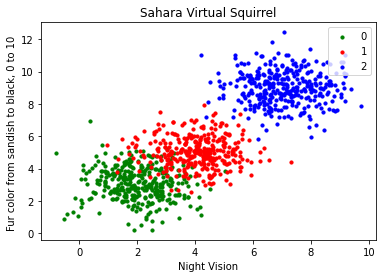

In [ ]:
file_data = np.loadtxt("squirrels.txt")
data = file_data[:,:-1]
labels = file_data[:,2:]
labels = labels.reshape((labels.shape[0]))
import matplotlib.pyplot as plt
colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
n_classes = 3
fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class,
1],
               c=colours[n_class], s=10, label=str(n_class))
ax.set(xlabel='Night Vision',
       ylabel='Fur color from sandish to black, 0 to 10 ',
       title='Sahara Virtual Squirrel')
ax.legend(loc='upper right')

In [1]:
from sklearn.model_selection import train_test_split
data_sets = train_test_split(data,
labels,
train_size=0.8,
test_size=0.2,
random_state=42
          # garantees same output for every run
)
train_data, test_data, train_labels, test_labels = data_sets
# import model
from sklearn.neighbors import KNeighborsClassifier
# create classifier
knn = KNeighborsClassifier(n_neighbors=8)
# train
knn.fit(train_data, train_labels)
# test on test data:
calculated_labels = knn.predict(test_data)
calculated_label

NameError: ignored

In [3]:
import numpy as np
import sklearn.datasets as ds
data, labels = ds.make_moons(n_samples=150,
shuffle=True,
noise=0.19,
random_state=None)
data += np.array(-np.ndarray.min(data[:,0]),
-np.ndarray.min(data[:,1]))
np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])

(0.0, 0.5529233351889487)

le bout de code precédent permet de générer un ensemble de 150 observations aléatoires par simulation avec make_moons. ces observations sont melangées et avec un bruit de 0.19

[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'Moons')]

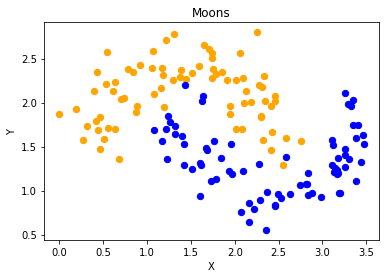

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data[labels==0, 0], data[labels==0, 1],
c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],
c='blue', s=40, label='blues')
ax.set(xlabel='X',
ylabel='Y',
title='Moons')
#ax.legend(loc='upper right');

notre ensemble de 150 observations est ainsi representé graphiquement en différenciant les deux classes constitutives par des couleurs différentes

In [6]:
min_x_new, max_x_new = 33, 88
min_y_new, max_y_new = 12, 20
data, labels = ds.make_moons(n_samples=100,shuffle=True,noise=0.05,random_state=None)
min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])
data[:6]

array([[ 0.24215243, -0.14259993],
       [ 0.91788647,  0.40395176],
       [ 1.55912465, -0.30661581],
       [ 2.0315017 ,  0.1929043 ],
       [ 0.71361787,  0.61036516],
       [ 0.22445098,  1.01914849]])

création de 100 autres observations en utilisants make_moons
affichage des 6 premiers éléments de cet ensemble

In [7]:
def scale_data(data, new_limits, inplace=False ):
    if not inplace:
        data = data.copy()
    min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
    max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])
    min_x_new, max_x_new = new_limits[0]
    min_y_new, max_y_new = new_limits[1]
    data -= np.array([min_x, min_y])
    data *= np.array([(max_x_new - min_x_new) / (max_x - min_x),(max_y_new - min_y_new) / (max_y - min_y)])
    data += np.array([min_x_new, min_y_new])
    if inplace:
        return None
    else:
        return data
data, labels = ds.make_moons(n_samples=100,shuffle=True,noise=0.05,random_state=None)
scale_data(data, [(1, 4), (3, 8)], inplace=True)
data[:10]

array([[3.88306785, 5.04254096],
       [1.70910833, 7.41690067],
       [2.04531097, 6.34831501],
       [2.56996055, 3.67753502],
       [3.22550699, 3.18347928],
       [2.04156602, 5.9191718 ],
       [1.14826158, 5.65584583],
       [2.5242733 , 3.55755994],
       [2.93058238, 3.28545779],
       [2.31437977, 7.35624199]])

ici on se sert des 100 données précédentes afin de faire une certaine normalisation.f(x) = ((b − a) ⋅ (x − min)/ max − min )+ a    est la formule utilisée ici pour génerer chaque nouvelle donnée

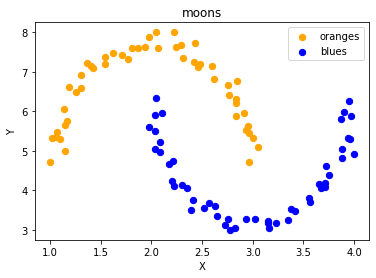

In [8]:
fig, ax = plt.subplots()
ax.scatter(data[labels==0, 0], data[labels==0, 1],
c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],
c='blue', s=40, label='blues')
ax.set(xlabel='X',
ylabel='Y',
title='moons')
ax.legend(loc='upper right');

tracé du graphique des données normalisées

In [9]:
import sklearn.datasets as ds
data, labels = ds.make_circles(n_samples=100,shuffle=True,noise=0.05,random_state=None)
# les données générées par cette partie sont sous forme circulaire

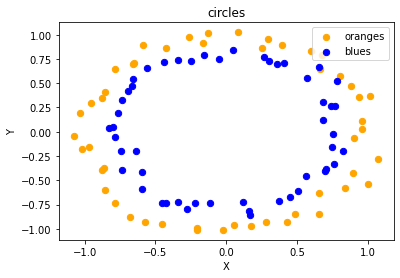

In [10]:
fig, ax = plt.subplots()
ax.scatter(data[labels==0, 0], data[labels==0, 1],
c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],
c='blue', s=40, label='blues')
ax.set(xlabel='X',
ylabel='Y',
title='circles')
ax.legend(loc='upper right')

Représentation graphique de nos 100 données simulées sous la forme d'un cercle

Automatically created module for IPython interactive environment


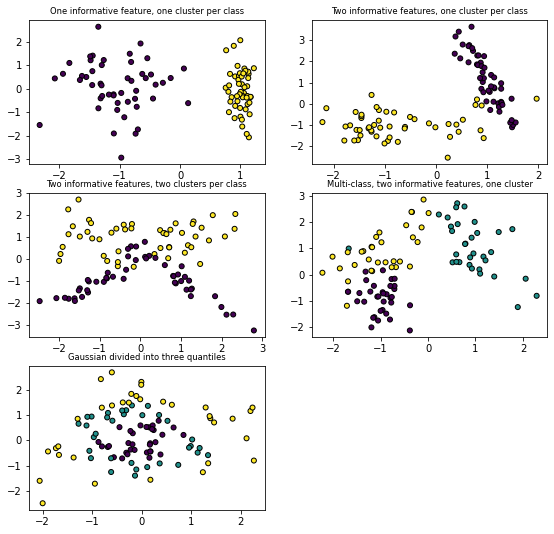

In [11]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
plt.subplot(323)
plt.title("Two informative features, two clusters per class",fontsize='small')
X2, Y2 = make_classification(n_features=2,n_redundant=0,n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,s=25, edgecolor='k')
plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster",fontsize='small')
X1, Y1 = make_classification(n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
plt.subplot(325)
plt.title("Gaussian divided into three quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
plt.show()

ici on génère plusieurs types de graphes.  le premier est un ensemble de données regroupé en deux qui sont séparés graphiquement par une seule 'ligne' et donc chacun forme un seul cluster.
le deuxième est un ensemble de données presque semblable au premier , sauf qu'ici les clusters sont assez proches.
le troisième est une simulation aussi semblables aux deux premières, sauf que chaque groupe de données est représenté ici par pratiquement deux clusters.
le 4e graphe est une simulation de trois classes différentes mais dont le regroupement est bien fait en un cluster pour chacunes.
le derniers schéma est une simulation des quantiles gaussiennes, divisés en trois classes.